#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


Let's take a look at a sample of the images in the dataset:

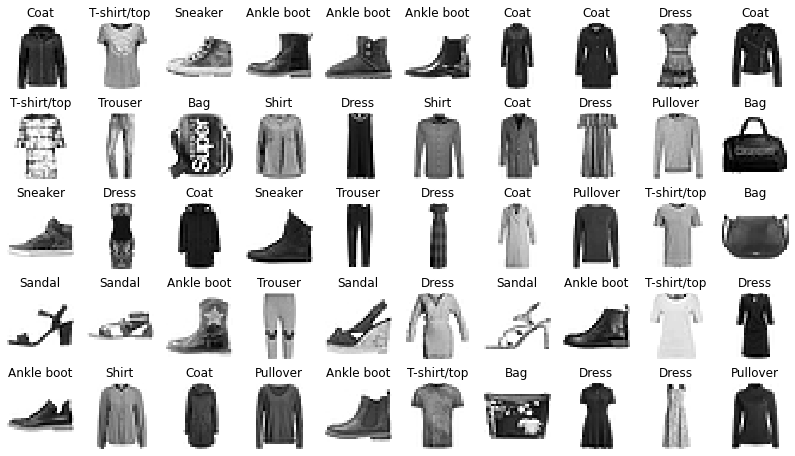

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [4]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_valid = (X_valid - mean)/std
X_test = (X_test - mean)/std

#Add one dimension to manage the channel
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test, 3)

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 26s 58ms/step - loss: 0.7428 - accuracy: 0.7573 - val_loss: 0.5129 - val_accuracy: 0.8264
Epoch 2/10
430/430 [==============================] - 25s 57ms/step - loss: 0.4787 - accuracy: 0.8339 - val_loss: 0.4377 - val_accuracy: 0.8540
Epoch 3/10
430/430 [==============================] - 25s 58ms/step - loss: 0.4263 - accuracy: 0.8518 - val_loss: 0.4109 - val_accuracy: 0.8656
Epoch 4/10
430/430 [==============================] - 25s 58ms/step - loss: 0.3980 - accuracy: 0.8619 - val_loss: 0.3837 - val_accuracy: 0.8730
Epoch 5/10
430/430 [==============================] - 25s 58ms/step - loss: 0.3776 - accuracy: 0.8694 - val_loss: 0.3734 - val_accuracy: 0.8764
Epoch 6/10
430/430 [==============================] - 25s 58ms/step - loss: 0.3625 - accuracy: 0.8737 - val_loss: 0.3614 - val_accuracy: 0.8766
Epoch 7/10
430/430 [==============================] - 25s 58ms/step - loss: 0.3500 - accuracy: 0.8771 - val_loss: 0.3545 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 2s - loss: 0.3667 - accuracy: 0.8703
accuracy: 87.03%


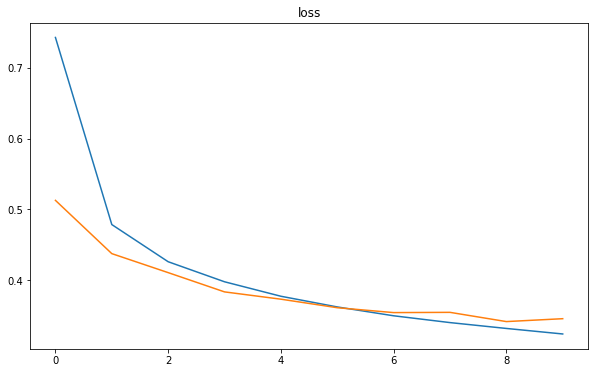

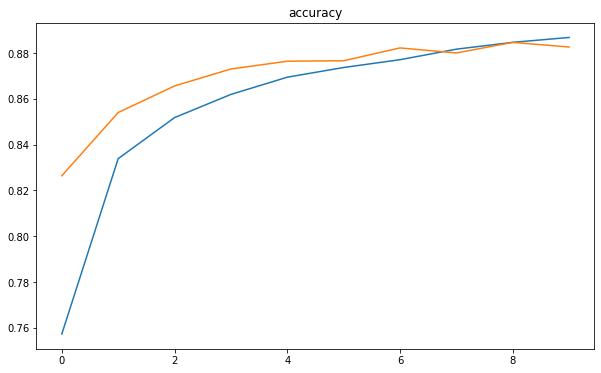

In [8]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

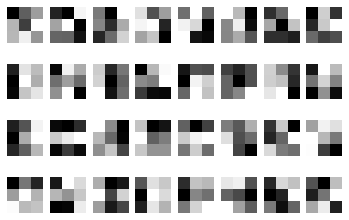

In [9]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
____________________________________________________

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   number_parameters = out_channels * ( kernel_h * kernel_w + 1 * in_channels) 
in fact for the first layer 320 = 32 * (3 * 3 * 1 + 1)
and for the second one 2064 = 16 * (2 * 2 * 32 + 1)

2. The number of parameters is different since they have different kernel sizes and in particular different number of input channels: the first layer recieve only the ones of the input data, instead the second one recieves an higher number of channels produced by the previous layers.

Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 27s 63ms/step - loss: 1.0499 - accuracy: 0.6492 - val_loss: 0.6546 - val_accuracy: 0.7584
Epoch 2/10
430/430 [==============================] - 27s 63ms/step - loss: 0.6106 - accuracy: 0.7779 - val_loss: 0.5624 - val_accuracy: 0.7924
Epoch 3/10
430/430 [==============================] - 27s 64ms/step - loss: 0.5358 - accuracy: 0.8078 - val_loss: 0.5205 - val_accuracy: 0.8194
Epoch 4/10
430/430 [==============================] - 27s 64ms/step - loss: 0.4915 - accuracy: 0.8266 - val_loss: 0.4702 - val_accuracy: 0.8416
Epoch 5/10
430/430 [==============================] - 27s 63ms/step - loss: 0.4626 - accuracy: 0.8387 - val_loss: 0.4485 - val_accuracy: 0.8478
Epoch 6/10
430/430 [==============================] - 27s 64ms/step - loss: 0.4434 - accuracy: 0.8442 - val_loss: 0.4639 - val_accuracy: 0.8364
Epoch 7/10
430/430 [==============================] - 27s 64ms/step - loss: 0.4294 - accuracy: 0.8500 - val_loss: 0.4435 - val_accuracy:

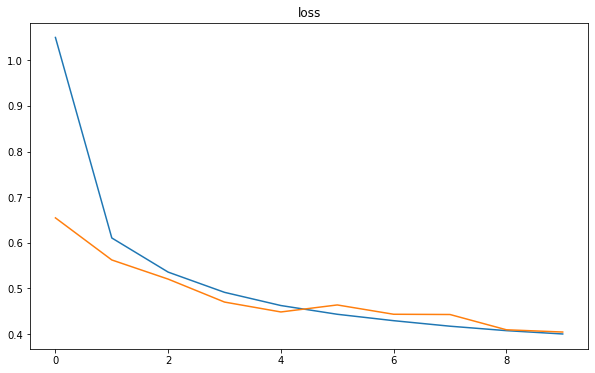

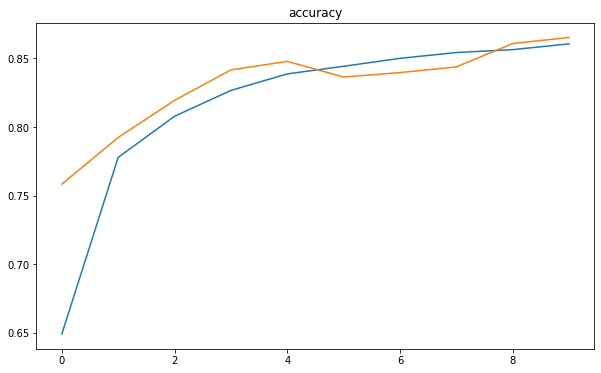

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [46]:
from keras.regularizers import l2

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=[3,3], activation='relu', input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Conv2D(filters=64, kernel_size=[3,3],  activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)              

In [47]:
history = model.fit(X_train, y_train, epochs=20, batch_size=80,
                  validation_data=(X_valid, y_valid))

Epoch 1/20
688/688 [==============================] - 41s 59ms/step - loss: 0.6055 - accuracy: 0.8053 - val_loss: 0.4668 - val_accuracy: 0.8580
Epoch 2/20
688/688 [==============================] - 41s 59ms/step - loss: 0.4272 - accuracy: 0.8668 - val_loss: 0.3995 - val_accuracy: 0.8762
Epoch 3/20
688/688 [==============================] - 41s 59ms/step - loss: 0.3829 - accuracy: 0.8810 - val_loss: 0.3691 - val_accuracy: 0.8848
Epoch 4/20
688/688 [==============================] - 41s 59ms/step - loss: 0.3550 - accuracy: 0.8910 - val_loss: 0.3612 - val_accuracy: 0.8922
Epoch 5/20
688/688 [==============================] - 41s 59ms/step - loss: 0.3357 - accuracy: 0.8967 - val_loss: 0.3516 - val_accuracy: 0.8854
Epoch 6/20
688/688 [==============================] - 41s 59ms/step - loss: 0.3230 - accuracy: 0.8996 - val_loss: 0.3340 - val_accuracy: 0.8954
Epoch 7/20
688/688 [==============================] - 41s 59ms/step - loss: 0.3112 - accuracy: 0.9041 - val_loss: 0.3423 - val_accuracy:

313/313 - 4s - loss: 0.3358 - accuracy: 0.9034
 accuracy: 90.34%
----------------------------


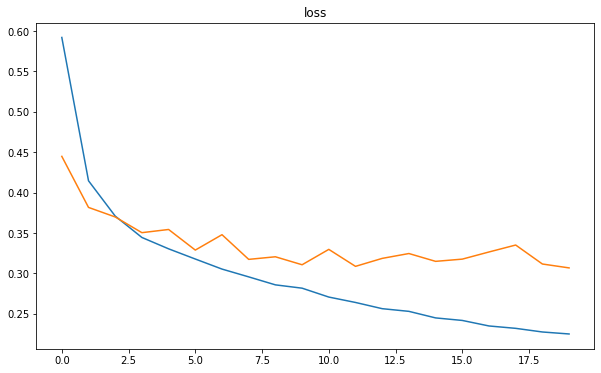

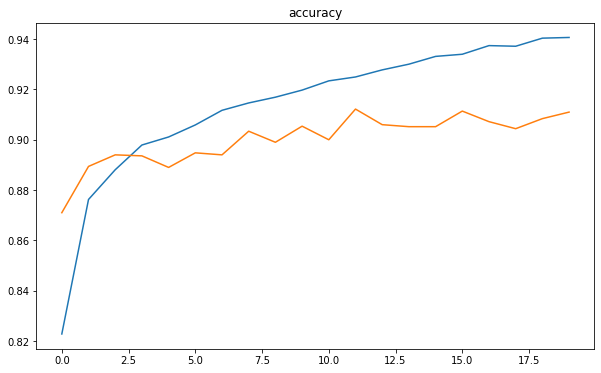

In [45]:
plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found has 3 convolutional layers, starting fron 32 number of filters an then doubling the number going deeper. Also the number of iteration is higher, it is equal to 20. 

The achieved accuracy in the test set is 90.34%
Discussion:

This model has boon chosen from the best one found changing only one aspect of the original model, to be more precise the one with one more convolutional layer. This has been combined with other two modification that achieved improvement: introduction of Adam optimizer and the number of filter that is doubled going in deeper layers.

This model is more complex than the original one (in fact the number of parameters is more than 10 times larger). More complexity produces two main negative effects:
* more risk of overfitting
* more time (thus number of iterations) needed for the convergence

In order to avoid those problems it has been added the l2 regularizer in the last layer, it has been increased the learning rate and number of epochs.
Nevertheless plot of accuracy shows overfitting is still present, also emerging from the fluctuations of the validation accuracy


Besides, I tested also other models: 
* one convolutional layer added with 64 filters and 3x3 kernel size --> 89.09% test accuracy
* second kernel size 3x3 --> 84.42%
 this gives a worsening of theperformance, probably the reduction of the input is too high 
* Adam optimizer with learning rate=0.01 --> 87.81% the improvement is not negligeble, Adam optimizer combined with this value of learning rate works better for this task 
* number of filters: for the first layer = 32, for the second one = 64 --> 88.18%
* number of filters: for the first layer = 32, for the second one = 64 --> 87.16% also in this case the results are better but the higher number of filter in last layer instead than in the first seems to be a better solution.
The reason is probably reated to the fact that, as we move forward in the layers, the patterns get more complex; hence there are larger combinations of patterns to capture. That's why we increase the filter size in subsequent layers to capture as many combinations as possible.
*number of filters: for the first layer = 128, for the second one = 256 --> 87.13%
 it shows overfitting, probably too many parameters without a proper regularization.
* first layer kernel size 4x4 --> 87.29%
* batch size = 256 --> 86.02% very similar result than the original one
*maxpool 4x4 -->85.16% again the performance is comparable
*epochs 20 --> 85.27% the results is very close, meaning the algorithm reaches its convergence within 10 epochs
* tanh in first, second or both layer --> 84.2%, 84.3%, 84.5%
relu works better than any combination of tanh activation function.
* sigmoid first --> 80.26% this larger decrease of the test accuracy is probably caused by a problem of vanishing gradient, typical of this activation function.
